In [44]:
import os
import csv
from utils import *
import numpy as np

models = ["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o", "distill-14b", "distill-7b", "qwen-7b", "distill-1.5b", "qwen-1.5b"]
instructions = [0, 1]
tasks = ["solve", "unsol"]
datasets = ["aime", "amc", "math", "minerva"]

input_dir = "../exp/{}_T0.0_{}/{}"
real_dir = "../figs/prec/{}"
prud_dir = "../figs/prud/{}"
length_dir = "../figs/length/{}"

real_dict = {}

for dataset in datasets:
    real_dict[dataset] = {}
    for model in models:
        real_dict[dataset][model] = {}
        for prompt in instructions:
            real_dict[dataset][model][prompt] = {}
            for task in tasks:
                input_path = os.path.join(input_dir.format(model, prompts[prompt], task), "pass.csv")
                
                results = []

                with open(input_path, mode='r') as file:
                    csv_reader = csv.DictReader(file)
                    for row in csv_reader:
                        if row["dataset"] == dataset:
                            real_dict[dataset][model][prompt][task] = row




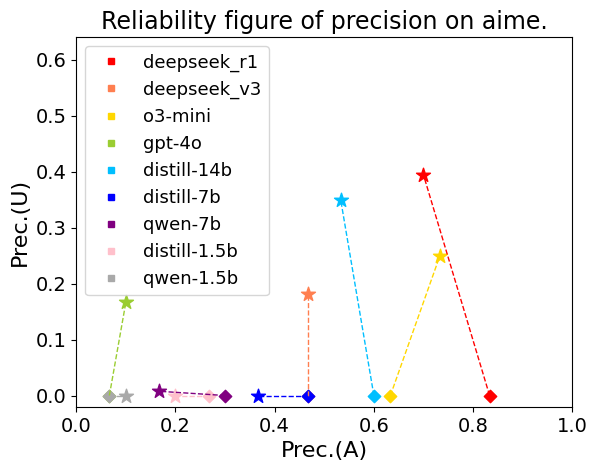

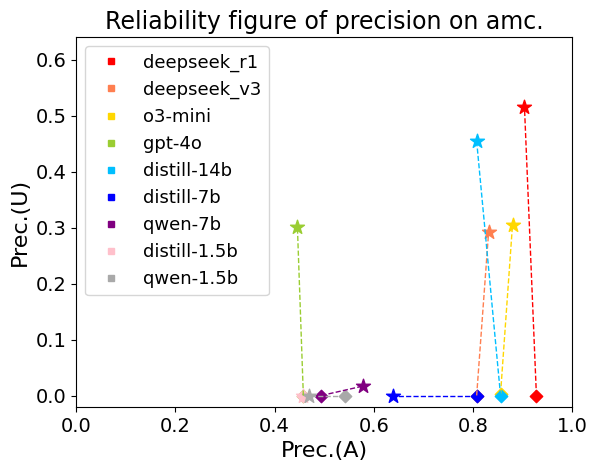

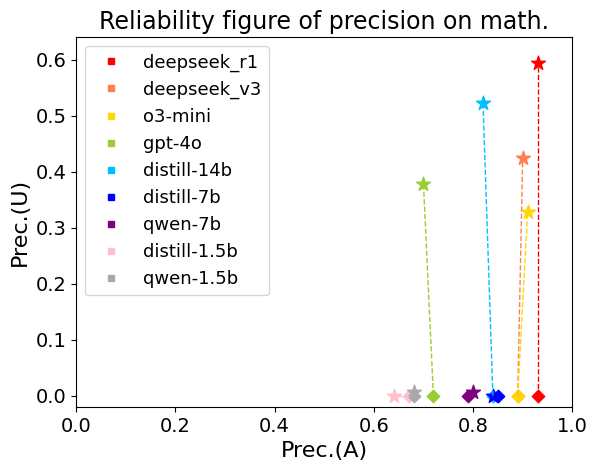

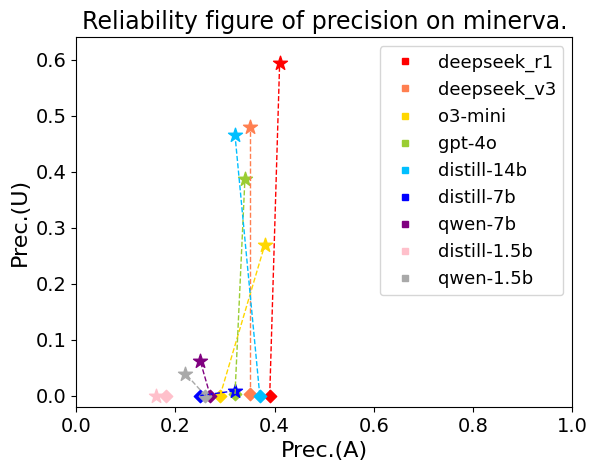

In [58]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

metric = "precision"

# colors = {
#     "deepseek_r1": "blue",
#     "deepseek_v3": "deepskyblue",
#     "o3-mini": "red",
#     "gpt-4o": "salmon",
#     "distill-32b": "purple",
#     "distill-14b": "cyan",
#     "distill-7b": "seagreen",
#     "qwen-7b": "yellow",
#     "distill-1.5b": "magenta",
#     "qwen-1.5b": "lightpink",
# }

colors = {
    "deepseek_r1": "red",
    "deepseek_v3": "coral",
    "o3-mini": "gold",
    "gpt-4o": "yellowgreen",
    "distill-32b": "green",
    "distill-14b": "deepskyblue",
    "distill-7b": "blue",
    "qwen-7b": "purple",
    "distill-1.5b": "pink",
    "qwen-1.5b": "darkgray",
}

# dataset = "aime"
for dataset in datasets:
    # plt.figure(figsize=(6, 8))
    plots_x_std, plots_y_std = [], []
    plots_x_rel, plots_y_rel = [], []
    for model in models:
        for prompt in instructions:
            x = real_dict[dataset][model][prompt]["solve"][metric]
            y = real_dict[dataset][model][prompt]["unsol"][metric]
            # print(f"{model} {prompt} {x} {y}")

            if prompt == 0:
                plt.scatter(float(x), float(y), marker='D', s=40, c=colors[model], label=f"{model}")
            else:
                plt.scatter(float(x), float(y), marker='*', s=110, c=colors[model])

        plt.plot([float(real_dict[dataset][model][0]["solve"][metric]), float(real_dict[dataset][model][1]["solve"][metric])], 
                    [float(real_dict[dataset][model][0]["unsol"][metric]), float(real_dict[dataset][model][1]["unsol"][metric])], 
                    color=colors[model], linestyle='--', linewidth=1)


    legend_elements = []
    for model in models:
        legend_elements.append(Line2D([0], [0], color=colors[model], lw=0, marker="s", label=model, markersize=4))

    plt.xlim(0.0, 1.0)
    plt.ylim(-0.02, 0.64)

    plt.title(f'Reliability figure of precision on {dataset}.', fontdict={'fontsize': 17})
    plt.xlabel('Prec.(A)', fontdict={'fontsize': 16})
    plt.ylabel('Prec.(U)', fontdict={'fontsize': 16})

    plt.tick_params(axis='both', labelsize=14)

    plt.legend(handles=legend_elements, fontsize=13)

    real_path = os.path.join(real_dir.format(dataset) + ".svg")
    plt.savefig(real_path, dpi=300, bbox_inches='tight')  # 保存为PNG文件
    plt.show()


In [25]:
metrics = ["precision", "prudence"]

for dataset in datasets:
    for model in ["distill-14b"]:
        for prompt in instructions:
            prec_sol = float(real_dict[dataset][model][prompt]["solve"]["precision"])
            prec_unl = float(real_dict[dataset][model][prompt]["unsol"]["precision"])
            prud_sol = float(real_dict[dataset][model][prompt]["solve"]["prudence"])
            prud_unl = float(real_dict[dataset][model][prompt]["unsol"]["prudence"])
            prec = (prec_sol + prec_unl) / 2
            prud = (prud_sol + prud_unl) / 2
            print(f"{model} {prompt} {dataset}: & {round(prec, 3)} & {round(prud, 3)}")

distill-14b 0 aime: & 0.3 & 0.0
distill-14b 1 aime: & 0.441 & 0.004
distill-14b 0 amc: & 0.428 & 0.0
distill-14b 1 amc: & 0.631 & 0.0
distill-14b 0 math: & 0.42 & 0.0
distill-14b 1 math: & 0.671 & 0.0
distill-14b 0 minerva: & 0.185 & 0.0
distill-14b 1 minerva: & 0.393 & 0.0


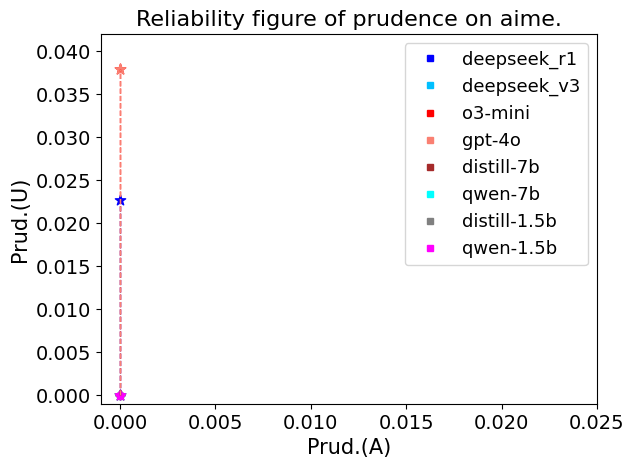

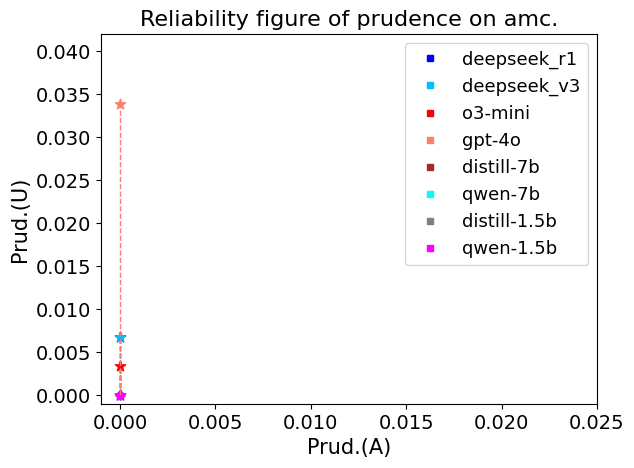

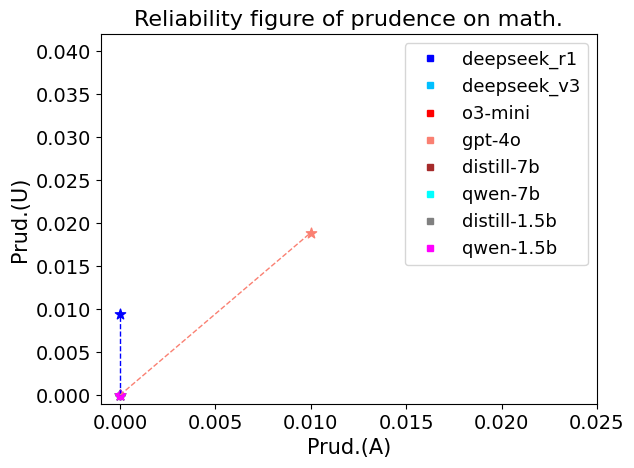

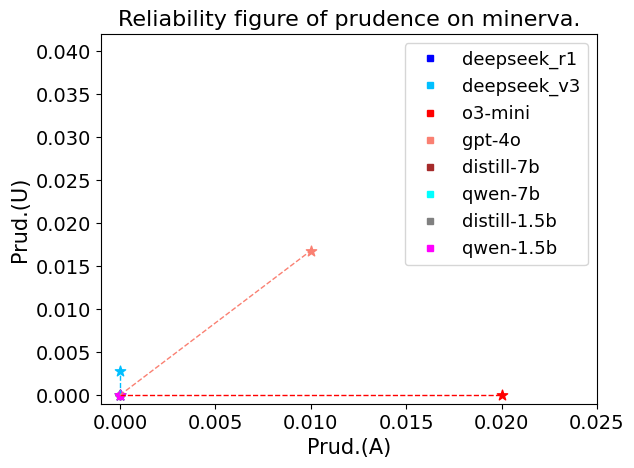

In [57]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

metric = "prudence"

colors = {
    "deepseek_r1": "blue",
    "deepseek_v3": "deepskyblue",
    "o3-mini": "red",
    "gpt-4o": "salmon",
    "distill-32b": "purple",
    "distill-14b": "pink",
    "distill-7b": "brown",
    "distill-1.5b": "gray",
    "qwen-7b": "cyan",
    "qwen-1.5b": "magenta",
}


# dataset = "aime"
for dataset in datasets:
    plots_x_std, plots_y_std = [], []
    plots_x_rel, plots_y_rel = [], []
    for model in models:
        for prompt in instructions:
            x = real_dict[dataset][model][prompt]["solve"][metric]
            y = real_dict[dataset][model][prompt]["unsol"][metric]
            # print(f"{model} {prompt} {x} {y}")

            if prompt == 0:
                plt.scatter(float(x), float(y), marker='D', s=20, c=colors[model], label=f"{model}")
            else:
                plt.scatter(float(x), float(y), marker='*', s=60, c=colors[model])

        plt.plot([float(real_dict[dataset][model][0]["solve"][metric]), float(real_dict[dataset][model][1]["solve"][metric])], 
                    [float(real_dict[dataset][model][0]["unsol"][metric]), float(real_dict[dataset][model][1]["unsol"][metric])], 
                    color=colors[model], linestyle='--', linewidth=1)


    legend_elements = []
    for model in models:
        legend_elements.append(Line2D([0], [0], color=colors[model], lw=0, marker="s", label=model, markersize=4))

    plt.xlim(-0.001, 0.025)
    plt.ylim(-0.001, 0.042)

    plt.title(f'Reliability figure of prudence on {dataset}.', fontdict={'fontsize': 16})
    plt.xlabel('Prud.(A)', fontdict={'fontsize': 15})
    plt.ylabel('Prud.(U)', fontdict={'fontsize': 15})

    plt.tick_params(axis='both', labelsize=14)

    plt.legend(handles=legend_elements, fontsize=13)

    prud_path = os.path.join(prud_dir.format(dataset) + ".svg")
    plt.savefig(prud_path, dpi=300, bbox_inches='tight')  # 保存为PNG文件
    plt.show()


## Dataset Analysis

### Rewriting types analysis and figure

deepseek_r1: total remove: 537, remove precision 0.4935
 total contradict: 565, contradict precision 0.6018.
deepseek_v3: total remove: 537, remove precision 0.3669
 total contradict: 565, contradict precision 0.3876.
o3-mini: total remove: 537, remove precision 0.2942
 total contradict: 565, contradict precision 0.292.
gpt-4o: total remove: 537, remove precision 0.3277
 total contradict: 565, contradict precision 0.3416.


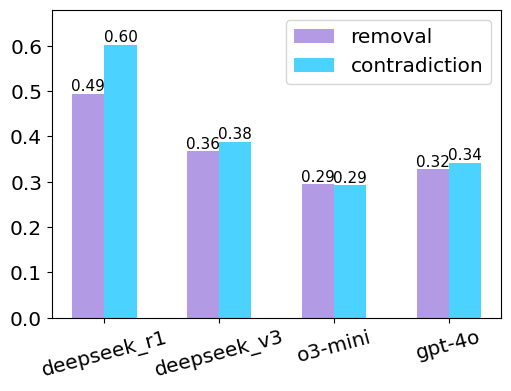

In [12]:
import os
import csv
from utils import *
import numpy as np

input_path = "../exp/{}_T0.0_real/unsol/{}.json"
fig_path = "../figs/data/{}"

models = ["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o", "distill-32b", "distill-14b", "distill-7b", "qwen-7b", "distill-1.5b", "qwen-1.5b"][:4]
datasets = ["aime", "amc", "math", "minerva"]

real_dict = {}
remove_list, contradict_list = [], []

for model in models:
    real_dict[model] = {"remove": {"success": 0, "refuse": 0}, "contradict": {"success": 0, "refuse": 0}}
    remove, contradict = 0, 0
    for dataset in datasets:
        input_file = input_path.format(model, dataset)
        try:
            data_pool = read_json(input_file)
        except json.JSONDecodeError:
            data_pool = read_jsonl(input_file)
        for data in data_pool:
            assert "remove" in data["data_id"] or "contradict" in data["data_id"]
            if "remove" in data["data_id"]:
                remove += 1
                if data["judge"] == "unsolvable":
                    real_dict[model]["remove"]["success"] += 1
                elif data["judge"] == "unknown":
                    real_dict[model]["remove"]["refuse"] += 1
            elif "contradict" in data["data_id"]:
                contradict += 1
                if data["judge"] == "unsolvable":
                    real_dict[model]["contradict"]["success"] += 1
                elif data["judge"] == "unknown":
                    real_dict[model]["contradict"]["refuse"] += 1
    remove_prec = round(real_dict[model]['remove']['success']/remove, 4)
    contradict_prec = round(real_dict[model]['contradict']['success']/contradict, 4)
    print(f"{model}: total remove: {remove}, remove precision {remove_prec}\n total contradict: {contradict}, contradict precision {contradict_prec}.")
    remove_list.append(real_dict[model]["remove"]["success"] / remove)
    contradict_list.append(real_dict[model]["contradict"]["success"] / contradict)

import matplotlib.pyplot as plt
import numpy as np

if len(models) == 4:
    plt.figure(figsize=(5.8, 4))
else:
    plt.figure(figsize=(16, 4))


bar_width = 0.28
x = np.arange(len(models))
x2 = x + bar_width

plt.bar(x, remove_list, width=bar_width, color="mediumpurple", label='removal', alpha=0.7)
plt.bar(x2, contradict_list, width=bar_width, color="deepskyblue", label='contradiction', alpha=0.7)

for idx in range(len(models)):
    plt.text(x[idx], remove_list[idx], str(round(remove_list[idx], 3))[:4], ha='center', va='bottom', fontsize=11)
    plt.text(x2[idx], contradict_list[idx], str(round(contradict_list[idx], 3))[:4], ha='center', va='bottom', fontsize=11)

plt.ylim(0.0, 0.68)
plt.xticks(x + bar_width * 0.5, models, rotation=15, fontsize=14.5)
plt.yticks(fontsize=14.5)

# 添加标题和图例
# plt.title("Precision of removal and contradiction \nunsolvable problems.", fontdict={'fontsize': 16})
# plt.xlabel("LLMs", fontdict={'fontsize': 13})
# plt.ylabel("Len.", fontdict={'fontsize': 15})
plt.legend(fontsize=14.5)

if len(models) == 4:
    rewrite_path = os.path.join(fig_path.format("rewrite") + ".svg")
else:
    rewrite_path = os.path.join(fig_path.format("rewrite") + "_all.svg")

plt.savefig(rewrite_path, dpi=300, bbox_inches='tight')
plt.show()


### Difficulty level analysis and figure

aime: remove: (24/43), contradict: (22/43), total (46/86) 
amc: remove: (47/84), contradict: (60/104), total (107/188) 
math: remove: (77/77), contradict: (75/89), total (152/166) 
minerva: remove: (87/98), contradict: (76/96), total (163/194) 
remove: (235/302), contradict: (233/332), total (468/634) 
model deepseek_r1: total diff_0: 468, diff_0 precision 0.5876 total diff_1: 634, diff_1 precision 0.5205.
model deepseek_v3: total diff_0: 468, diff_0 precision 0.4487 total diff_1: 634, diff_1 precision 0.3249.
model o3-mini: total diff_0: 468, diff_0 precision 0.3376 total diff_1: 634, diff_1 precision 0.2603.
model gpt-4o: total diff_0: 468, diff_0 precision 0.4103 total diff_1: 634, diff_1 precision 0.2792.


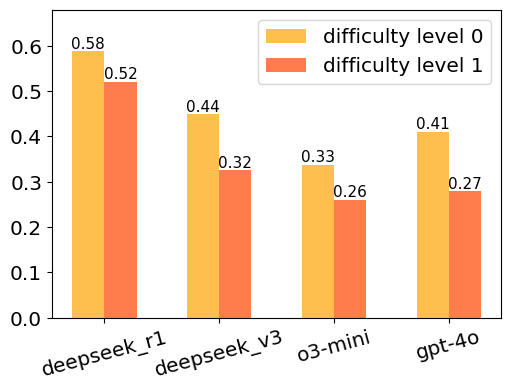

In [13]:
import os
import csv
from utils import *
import numpy as np

input_path = "../exp/{}_T0.0_real/unsol/{}.json"
data_path = "../data/unsol/{}.json"
datasets = ["aime", "amc", "math", "minerva"]

diff_dict = {}
diff_0_rmv_cnt, diff_1_rmv_cnt, diff_0_contra_cnt, diff_1_contra_cnt = 0, 0, 0, 0
for dataset in datasets:
    diff_0_rmv, diff_1_rmv, diff_0_contra, diff_1_contra = 0, 0, 0, 0
    data_pool = read_json(data_path.format(dataset))
    for data in data_pool:
        diff_dict[data["data_id"]] = data["difficulty_eval"]
        if "remove" in data["data_id"]:
            if data["difficulty_eval"] == 0:
                diff_0_rmv += 1
            elif data["difficulty_eval"] == 1:
                diff_1_rmv += 1
        elif "contradict" in data["data_id"]:
            if data["difficulty_eval"] == 0:
                diff_0_contra += 1
            elif data["difficulty_eval"] == 1:
                diff_1_contra += 1
            else:
                diff_1_contra += 1
    diff_0_rmv_cnt += diff_0_rmv
    diff_1_rmv_cnt += diff_1_rmv
    diff_0_contra_cnt += diff_0_contra
    diff_1_contra_cnt += diff_1_contra
    print(f"{dataset}: remove: ({diff_0_rmv}/{diff_1_rmv}), contradict: ({diff_0_contra}/{diff_1_contra}), total ({diff_0_rmv + diff_0_contra}/{diff_1_rmv + diff_1_contra}) ")
print(f"remove: ({diff_0_rmv_cnt}/{diff_1_rmv_cnt}), contradict: ({diff_0_contra_cnt}/{diff_1_contra_cnt}), total ({diff_0_rmv_cnt + diff_0_contra_cnt}/{diff_1_rmv_cnt + diff_1_contra_cnt}) ")

diff_0 = diff_0_rmv_cnt + diff_0_contra_cnt
diff_1 = diff_1_rmv_cnt + diff_1_contra_cnt

fig_path = "../figs/data/{}"

models = ["deepseek_r1", "deepseek_v3", "o3-mini", "gpt-4o", "distill-32b", "distill-14b", "distill-7b", "qwen-7b", "distill-1.5b", "qwen-1.5b"][:4]

real_dict = {}
diff_0_list, diff_1_list = [], []

for model in models:
    diff_0_success, diff_1_success = 0, 0
    for dataset in datasets:
        input_file = input_path.format(model, dataset)
        try:
            data_pool = read_json(input_file)
        except json.JSONDecodeError:
            data_pool = read_jsonl(input_file)
        for data in data_pool:
            assert data["data_id"] in diff_dict
            if data["judge"] == "unsolvable":
                if diff_dict[data["data_id"]] == 0:
                    diff_0_success += 1
                elif diff_dict[data["data_id"]] == 1:
                    diff_1_success += 1
    diff_0_prec = round(diff_0_success / diff_0, 4)
    diff_1_prec = round(diff_1_success / diff_1, 4)
    print(f"model {model}: total diff_0: {diff_0}, diff_0 precision {diff_0_prec} total diff_1: {diff_1}, diff_1 precision {diff_1_prec}.")

    diff_0_list.append(diff_0_success / diff_0)
    diff_1_list.append(diff_1_success / diff_1)

import matplotlib.pyplot as plt
import numpy as np

if len(models) == 4:
    plt.figure(figsize=(5.8, 4))
else:
    plt.figure(figsize=(16, 4))

bar_width = 0.28
x = np.arange(len(models))
x2 = x + bar_width

plt.bar(x, diff_0_list, width=bar_width, color="orange", label='difficulty level 0', alpha=0.7)
plt.bar(x2, diff_1_list, width=bar_width, color="orangered", label='difficulty level 1', alpha=0.7)

for idx in range(len(models)):
    plt.text(x[idx], diff_0_list[idx], str(round(diff_0_list[idx], 3))[:4], ha='center', va='bottom', fontsize=11)
    plt.text(x2[idx], diff_1_list[idx], str(round(diff_1_list[idx], 3))[:4], ha='center', va='bottom', fontsize=11)

plt.ylim(0.0, 0.68)
plt.xticks(x + bar_width * 0.5, models, rotation=15, fontsize=14.5)
plt.yticks(fontsize=14.5)

# plt.title("Precision of diffculty level 0 and 1 of \nunsolvable problems.", fontdict={'fontsize': 16})
# plt.xlabel("LLMs", fontdict={'fontsize': 13})
# plt.ylabel("Len.", fontdict={'fontsize': 15})
plt.legend(fontsize=14.5)

if len(models) == 4:
    rewrite_path = os.path.join(fig_path.format("diff") + ".svg")
else:
    rewrite_path = os.path.join(fig_path.format("diff") + "_all.svg")
plt.savefig(rewrite_path, dpi=300, bbox_inches='tight')
plt.show()


In [124]:
import os
import csv
from utils import *
import numpy as np

models = ["gpt-4o"]
instructions = [0, 1]
tasks = ["solve", "unsol"]
datasets = ["aime", "amc", "math", "minerva"]
id_datasets = ["aime", "amc", "math"]
ood_datasets = ["minerva"]
# datasets = id_datasets

input_dir = "../exp/{}_T0.0_{}/{}"
real_dir = "../figs/real/{}"
prud_dir = "../figs/prud/{}"
length_dir = "../figs/length/{}"

count_task = {
    "solve_id_all": 213,
    "solve_ood_all": 100,
    "unsol_id_all": 745,
    "unsol_ood_all": 357,
    "solve": {
        "aime": 30,
        "amc": 83,
        "math": 100,
        "minerva": 100
    },
    "unsol": {
        "aime": 132,
        "amc": 295,
        "math": 318,
        "minerva": 357
    }
}

real_dict = {}

for dataset in datasets:
    real_dict[dataset] = {}
    for model in models:
        real_dict[dataset][model] = {}
        for prompt in instructions:
            real_dict[dataset][model][prompt] = {}
            for task in tasks:
                input_path = os.path.join(input_dir.format(model, prompts[prompt], task), "pass.csv")
                
                results = []

                with open(input_path, mode='r') as file:
                    csv_reader = csv.DictReader(file)
                    for row in csv_reader:
                        if row["dataset"] == dataset:
                            assert int(row["success"]) + int(row["failed"]) + int(row["unknown"]) == count_task[task][dataset], f"Error in {dataset} {model} {prompt} {task}: {row['success']} + {row['failed']} + {row['unknown']} != {count_task[task][dataset]}"
                            real_dict[dataset][model][prompt][task] = row


for model in models:
    for prompt in instructions:
        precision, prudence, length = {}, {}, {}
        for task in tasks:
            precision[task], prudence[task], length[task] = 0, 0, 0
            for dataset in id_datasets:
                precision[task] += float(real_dict[dataset][model][prompt][task]["precision"]) * (count_task[task][dataset] / count_task["{}_id_all".format(task)])
                prudence[task] += float(real_dict[dataset][model][prompt][task]["prudence"]) * (count_task[task][dataset] / count_task["{}_id_all".format(task)])
                # length[task] += int(real_dict[dataset][model][prompt][task]["length"]) * (count_task[task][dataset] / count_task["{}_id_all".format(task)])
            # precision[task] /= len(datasets)
            # prudence[task] /= len(datasets)
            # length[task] /= len(datasets)
        print(f"{model} {prompt} id: & {round(precision['solve'], 3)} & {round(prudence['solve'], 3)} & \
{round(precision['unsol'], 3)} & {round(prudence['unsol'], 3)} & \
{round((precision['solve'] + precision['unsol']) / 2, 3)} & {round((prudence['solve'] + prudence['unsol']) / 2, 3)}")
#         print(f"{model} {prompt} avg: & {round(precision['solve'], 3)} & {round(prudence['solve'], 3)} & {round(length['solve']/1000, 2)}k & \
# {round(precision['unsol'], 3)} & {round(prudence['unsol'], 3)} & {round(length['unsol']/1000, 1)}k & \
# {round((precision['solve'] + precision['unsol']) / 2, 3)} & {round((prudence['solve'] + prudence['unsol']) / 2, 3)}")

for model in models:
    for prompt in instructions:
        precision, prudence, length = {}, {}, {}
        for task in tasks:
            precision[task], prudence[task], length[task] = 0, 0, 0
            for dataset in ood_datasets:
                # print(f"dataset: {dataset}")
                precision[task] += float(real_dict[dataset][model][prompt][task]["precision"]) * (count_task[task][dataset] / count_task["{}_ood_all".format(task)])
                prudence[task] += float(real_dict[dataset][model][prompt][task]["prudence"]) * (count_task[task][dataset] / count_task["{}_ood_all".format(task)])
                # length[task] += int(real_dict[dataset][model][prompt][task]["length"]) * (count_task[task][dataset] / count_task["{}_ood_all".format(task)])
            # precision[task] /= len(datasets)
            # prudence[task] /= len(datasets)
            # length[task] /= len(datasets)
        print(f"{model} {prompt} ood: & {round(precision['solve'], 3)} & {round(prudence['solve'], 3)} & \
{round(precision['unsol'], 3)} & {round(prudence['unsol'], 3)} & \
{round((precision['solve'] + precision['unsol']) / 2, 3)} & {round((prudence['solve'] + prudence['unsol']) / 2, 3)}")

gpt-4o 0 id: & 0.526 & 0.0 & 0.0 & 0.0 & 0.263 & 0.0
gpt-4o 1 id: & 0.516 & 0.005 & 0.31 & 0.028 & 0.413 & 0.016
gpt-4o 0 ood: & 0.32 & 0.0 & 0.003 & 0.0 & 0.161 & 0.0
gpt-4o 1 ood: & 0.34 & 0.01 & 0.387 & 0.017 & 0.363 & 0.013
